In [55]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
import seaborn as sb
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
import warnings
warnings.filterwarnings("ignore")

In [4]:
data=pd.read_csv('diabetes.csv')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
data.loc[data['Glucose']==0,'Glucose']=data['Glucose'].mean()
data.loc[data['BloodPressure']==0,'BloodPressure']=data['BloodPressure'].mean()
data.loc[data['SkinThickness']==0,'SkinThickness']=data['SkinThickness'].mean()
data.loc[data['Insulin']==0,'Insulin']=data['Insulin'].mean()
data.loc[data['BMI']==0,'BMI']=data['BMI'].mean()

In [8]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<AxesSubplot: >

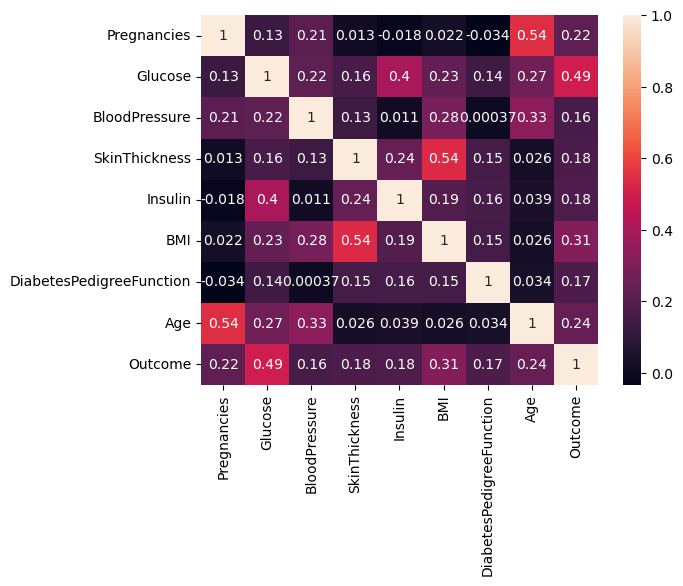

In [9]:
sb.heatmap(data.corr(),annot=True)

In [10]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


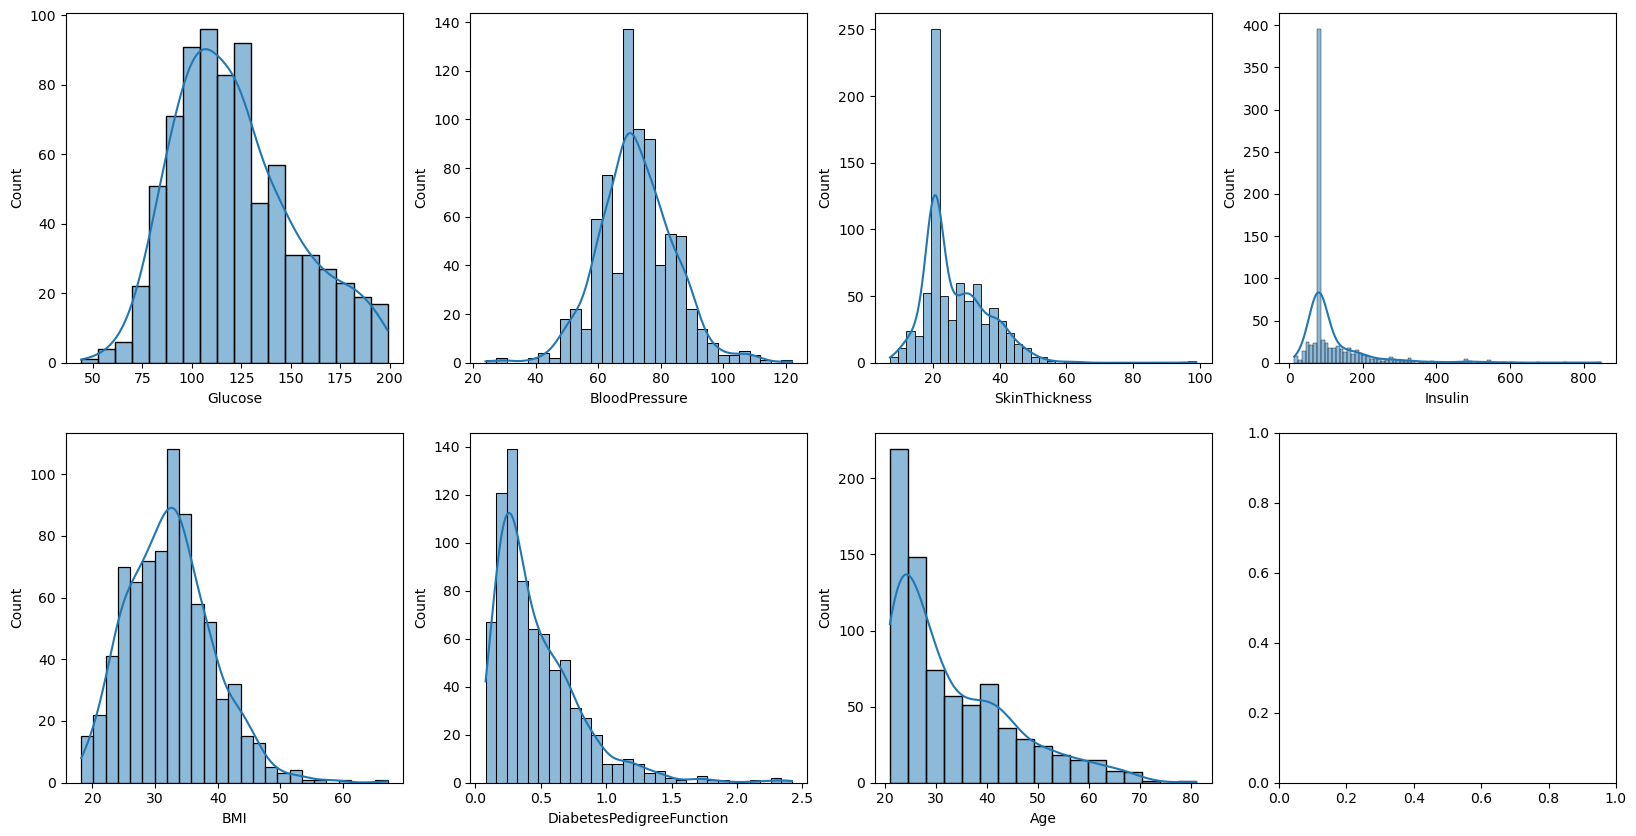

In [11]:
plt.subplots(nrows=2,ncols=4,figsize=(20,10))
i=1
while(i<len(data.columns)-1): 
    plt.subplot(2,4,i)
    sb.histplot(data=data,x=data.columns[i],kde=True)
    i+=1

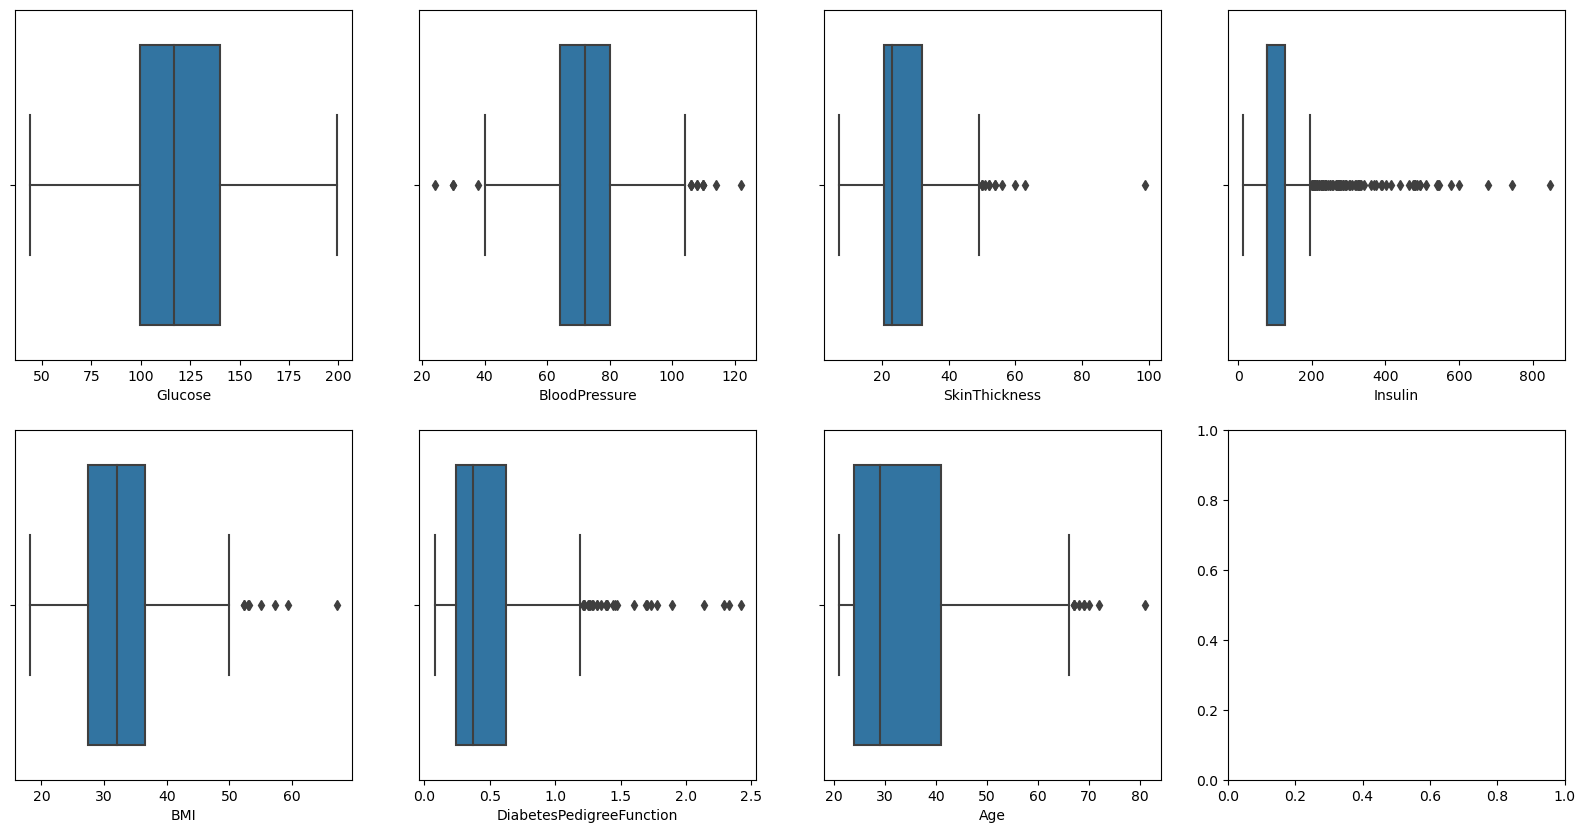

In [12]:
plt.subplots(nrows=2,ncols=4,figsize=(20,10))
i=1
while(i<len(data.columns)-1): 
    plt.subplot(2,4,i)
    sb.boxplot(data=data,x=data.columns[i])
    i+=1

In [13]:
iqr_g=np.percentile(data['Glucose'],75)-np.percentile(data['Glucose'],25)
lcl_g=np.percentile(data['Glucose'],25)-(1.5*iqr_g)
ucl_g=np.percentile(data['Glucose'],75)+(1.5*iqr_g)

In [14]:
iqr_p=np.percentile(data['BloodPressure'],75)-np.percentile(data['BloodPressure'],25)
lcl_p=np.percentile(data['BloodPressure'],25)-(1.5*iqr_p)
ucl_p=np.percentile(data['BloodPressure'],75)+(1.5*iqr_p)

In [15]:
iqr_s=np.percentile(data['SkinThickness'],75)-np.percentile(data['SkinThickness'],25)
lcl_s=np.percentile(data['SkinThickness'],25)-(1.5*iqr_s)
ucl_s=np.percentile(data['SkinThickness'],75)+(1.5*iqr_s)

In [16]:
iqr_i=np.percentile(data['Insulin'],75)-np.percentile(data['Insulin'],25)
lcl_i=np.percentile(data['Insulin'],25)-(1.5*iqr_i)
ucl_i=np.percentile(data['Insulin'],75)+(1.5*iqr_i)

In [17]:
iqr_b=np.percentile(data['BMI'],75)-np.percentile(data['BMI'],25)
lcl_b=np.percentile(data['BMI'],25)-(1.5*iqr_b)
ucl_b=np.percentile(data['BMI'],75)+(1.5*iqr_b)

In [18]:
iqr_d=np.percentile(data['DiabetesPedigreeFunction'],75)-np.percentile(data['DiabetesPedigreeFunction'],25)
lcl_d=np.percentile(data['DiabetesPedigreeFunction'],25)-(1.5*iqr_d)
ucl_d=np.percentile(data['DiabetesPedigreeFunction'],75)+(1.5*iqr_d)

In [19]:
iqr_a=np.percentile(data['Age'],75)-np.percentile(data['Age'],25)
lcl_a=np.percentile(data['Age'],25)-(1.5*iqr_a)
ucl_a=np.percentile(data['Age'],75)+(1.5*iqr_a)

In [20]:
data.loc[(data['Glucose']<lcl_g) | (data['Glucose']>ucl_g),'Glucose']=data['Glucose'].mean()

In [21]:
data.loc[(data['BloodPressure']<lcl_p) | (data['BloodPressure']>ucl_p),'BloodPressure']=data['BloodPressure'].mean()

In [22]:
data.loc[(data['SkinThickness']<lcl_s) | (data['SkinThickness']>ucl_s),'SkinThickness']=data['SkinThickness'].mean()

In [23]:
data.loc[(data['Insulin']<lcl_i) | (data['Insulin']>ucl_i),'Insulin']=data['Insulin'].mean()

In [24]:
data.loc[(data['DiabetesPedigreeFunction']<lcl_d) | (data['DiabetesPedigreeFunction']>ucl_d),'DiabetesPedigreeFunction']=data['DiabetesPedigreeFunction'].mean()

In [25]:
data.loc[(data['Age']<lcl_a) | (data['Age']>ucl_a),'Age']=data['Age'].mean()

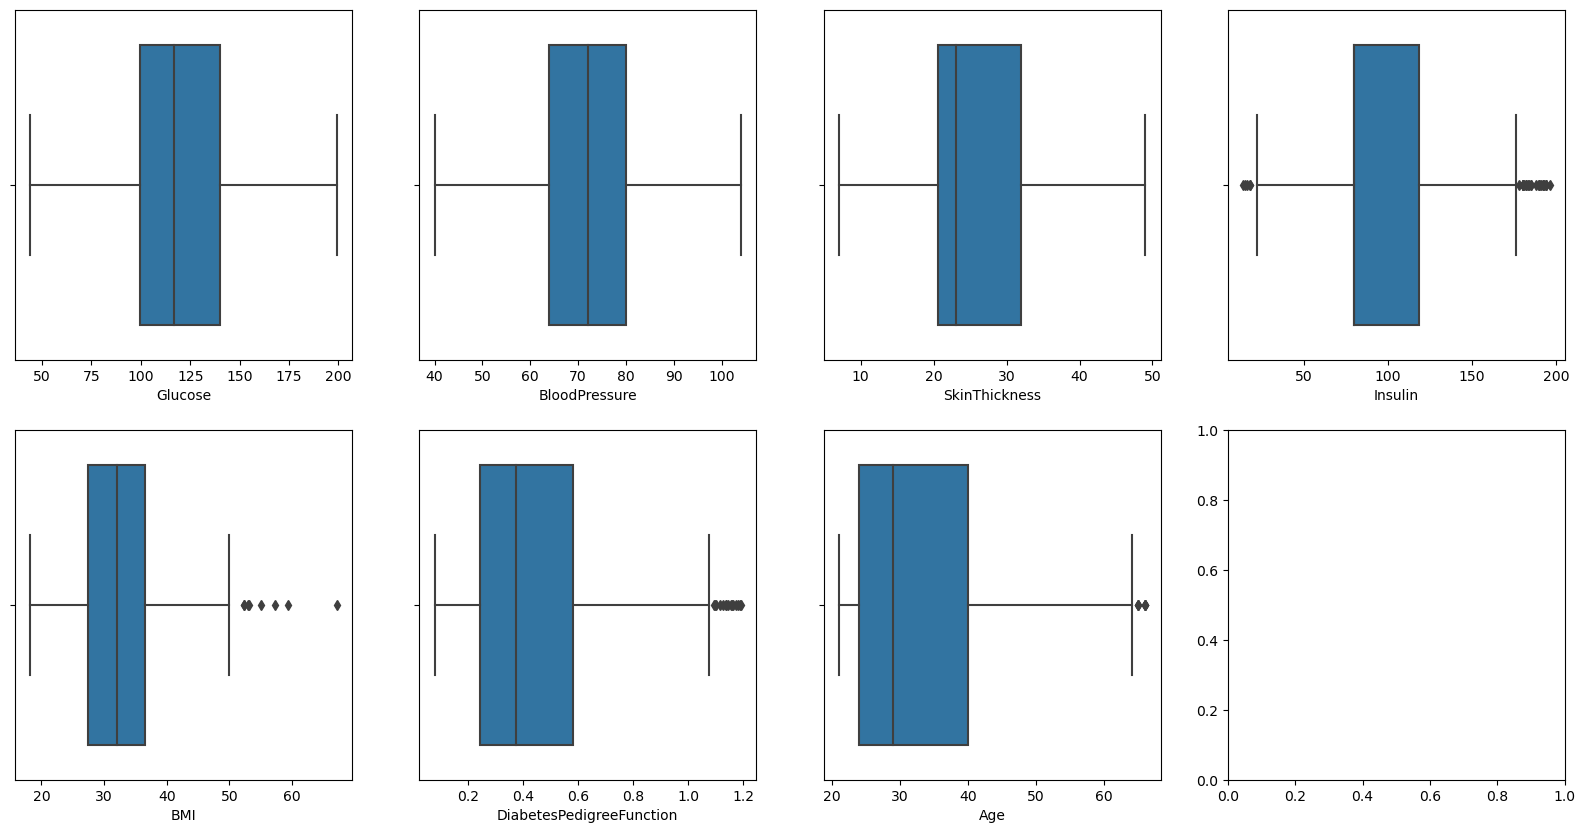

In [26]:
plt.subplots(nrows=2,ncols=4,figsize=(20,10))
i=1
while(i<len(data.columns)-1): 
    plt.subplot(2,4,i)
    sb.boxplot(data=data,x=data.columns[i])
    i+=1

In [27]:
data[data.isnull()].sum()

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

In [28]:
x=data.iloc[:,:8]

In [29]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [30]:
y=data.iloc[:,8:]

In [31]:
y

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [32]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.33,random_state=44)

In [100]:
classifier=DecisionTreeClassifier(random_state=42)

In [101]:
classifier

DecisionTreeClassifier(random_state=42)

In [102]:
classifier.fit(xtrain,ytrain)

DecisionTreeClassifier(random_state=42)

<function matplotlib.pyplot.show(close=None, block=None)>

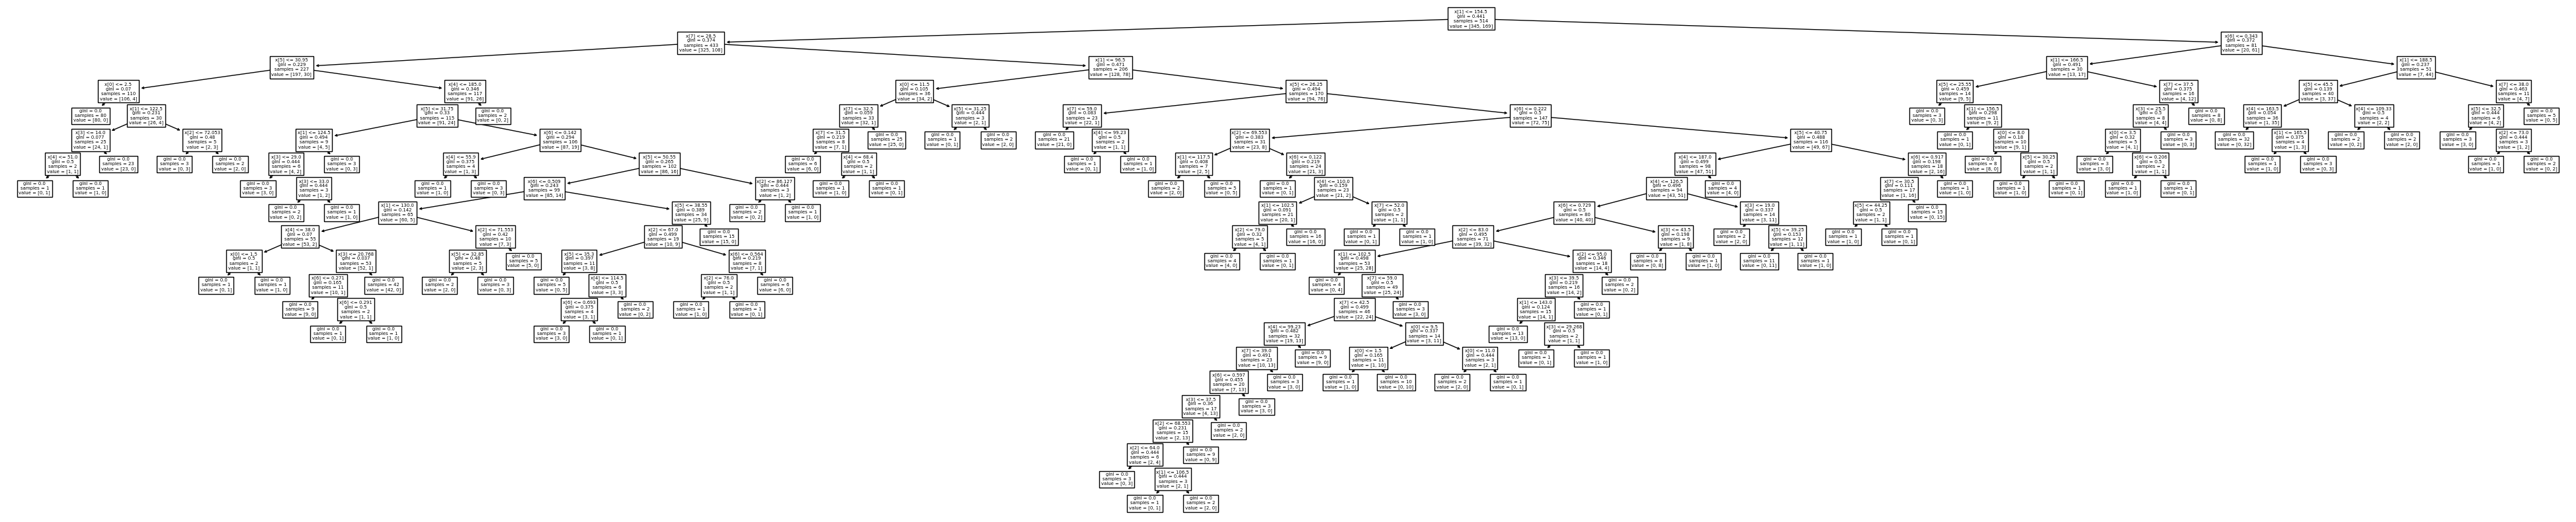

In [103]:
plt.figure(figsize=(50,10))
plot_tree(classifier)
plt.show

In [104]:
parameter={"criterion":["gini", "entropy", "log_loss"],"splitter":["best", "random"],"max_depth":[1,2,3,4,5,6,7,8,9],"max_features":["auto", "sqrt", "log2","None"]}

In [106]:
grid=GridSearchCV(classifier,param_grid=parameter,cv=5,scoring='accuracy')

In [107]:
grid.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'max_features': ['auto', 'sqrt', 'log2', 'None'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [108]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'log2',
 'splitter': 'best'}

In [139]:
clsf=DecisionTreeClassifier(criterion="gini",max_depth=2,max_features='log2',splitter='best')

In [140]:
clsf.fit(xtrain,ytrain)

DecisionTreeClassifier(max_depth=2, max_features='log2')

<function matplotlib.pyplot.show(close=None, block=None)>

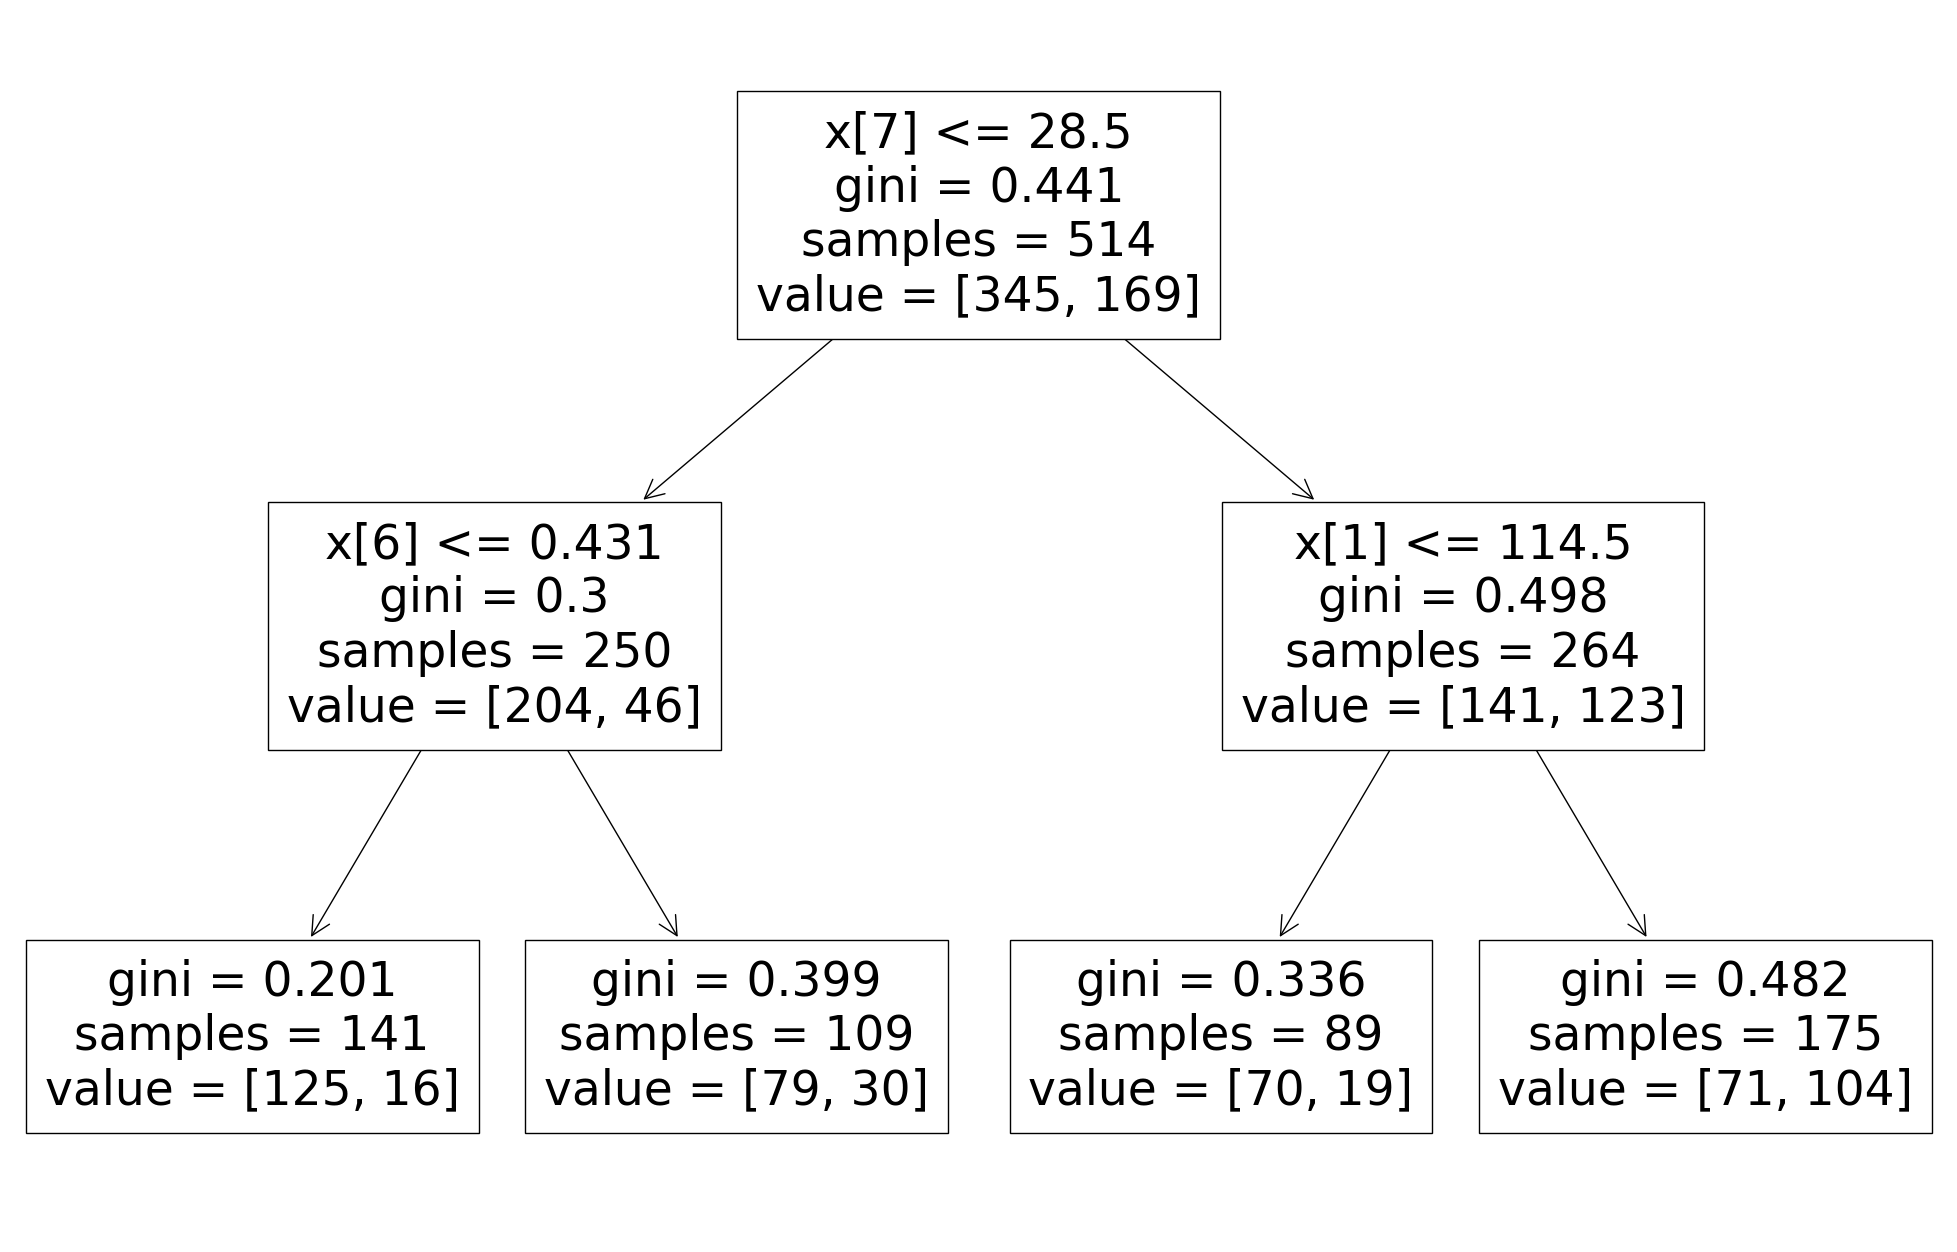

In [141]:
fig,ax=plt.subplots(figsize=(25,16))
plot_tree(clsf,ax=ax)
plt.show

In [142]:
ypred=clsf.predict(xtest)

In [143]:
accuracy_score(ytest,ypred)

0.7204724409448819

In [144]:
confusion_matrix(ytest,ypred)

array([[127,  28],
       [ 43,  56]])

In [138]:
x.iloc[:,7]

0      50.0
1      31.0
2      32.0
3      21.0
4      33.0
       ... 
763    63.0
764    27.0
765    30.0
766    47.0
767    23.0
Name: Age, Length: 768, dtype: float64

In [148]:
"""In the above decision tree the root node start from age while the limit is 28.5. 
    uptill the thrid iteration the we can do prediction using the post proning
    the most relevant foctors are 
"""
pd.DataFrame([x.iloc[:,7],x.iloc[:,1],x.iloc[:,6]])


,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
Age,50.000,31.000,32.000,21.000,33.000000,30.000,26.000,29.000,53.000,54.000,...,26.000,66.000,22.000,43.000,33.000,63.000,27.00,30.000,47.000,23.000
Glucose,148.000,85.000,183.000,89.000,137.000000,116.000,78.000,115.000,197.000,125.000,...,106.000,190.000,88.000,170.000,89.000,101.000,122.00,121.000,126.000,93.000
DiabetesPedigreeFunction,0.627,0.351,0.672,0.167,0.471876,0.201,0.248,0.134,0.158,0.232,...,0.197,0.278,0.766,0.403,0.142,0.171,0.34,0.245,0.349,0.315
